In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
initial_df = pd.read_csv('/Train.csv')
print(f"The dataset contains {len(initial_df)} listings")
pd.set_option('display.max_columns', len(initial_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
initial_df.head(7)

The dataset contains 3013 listings


,name,summary,description,neighborhood_overview,transit,host_since,host_location,host_about,host_response_rate,host_acceptance_rate,host_neighbourhood,host_verifications,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month
0,Guest Quarters on Capitol Hill,The Guest Quarters on Capitol Hill is a garde...,The Guest Quarters on Capitol Hill is a garde...,the convenience and charm of being on Capitol ...,The Red Line and the Blue Line Metros are with...,2013-08-14,"Washington, District of Columbia, United States",We are a reservation service for many DC area ...,98%,52%,LeDroit Park,"['email', 'phone', 'reviews', 'kba']","Union Station, Stanton Park, Kingman Park",Washington,DC,20002,D.C.,"Washington, DC",US,United States,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,{},$195.00,NaN,2,3,90,2,90.0,10.0,10.0,10.0,10.0,10.0,8.0,f,strict,41,0.18
1,Private oasis. Top floor w/ 2 decks,"Top two floors, two bathrooms and two decks. M...","Top two floors, two bathrooms and two decks. M...",Adams Morgan is the most vibrant part of DC wh...,There is so many transportation options. Acros...,2012-01-23,"Washington, District of Columbia, United States","I have lived in DC for that past five years, b...",100%,100%,Adams Morgan,"['email', 'phone', 'facebook', 'reviews', 'kba']","Kalorama Heights, Adams Morgan, Lanier Heights",Washington,DC,20009,D.C.,"Washington, DC",US,United States,Apartment,Entire home/apt,2,1.5,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",$150.00,$50.00,2,2,1125,2,90.0,9.0,9.0,10.0,9.0,10.0,9.0,f,strict,1,0.41
2,People's Place -Convention Center,NaN,This 2 bedroom apartment is on the ground floo...,NaN,NaN,2009-10-31,"Berkeley, California, United States",A professional photo editor and photographer l...,97%,100%,Bedford-Stuyvesant,"['email', 'phone', 'facebook', 'linkedin', 're...","Shaw, Logan Circle",Washington,DC,20001,D.C.,"Washington, DC",US,United States,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",$140.00,$75.00,4,4,90,53,83.0,8.0,8.0,9.0,9.0,9.0,9.0,f,strict,3,1.09
3,M St Apt C,"Inspired by MidEast styles. 1 full bed, 1 air ...","Inspired by MidEast styles. 1 full bed, 1 air ...",I love this neighborhood! Mt. Vernon is the ve...,The Mt. Vernon Sq metro is just 2 blocks away ...,2013-04-23,"San Francisco, California, United States","I am from Oakland, California and I like to li...",92%,100%,Shaw,"['email', 'phone', 'facebook', 'linkedin', 're...","Shaw, Logan Circle",Washington,DC,20001,D.C.,"Washington, DC",US,United States,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$110.00,$35.00,0,2,1125,32,84.0,9.0,8.0,8.0,8.0,9.0,9.0,f,flexible,4,4.34
4,Columbia Heights Rm w/Private Bath,Enjoy our dressed up guest room in the heart o...,Enjoy our dressed up guest room in the heart o...,NaN,NaN,2012-07-09,"Washington, District of Columbia, United States",I'm a tree-hugger at heart. My wife is an arti...,100%,75%,Park View,"['email', 'phone', 'facebook', 'linkedin', 're...","Columbia Heights, Mt. Pleasant, Pleasant Plain...",Washington,DC,20001,D.C.,"Washington, DC",US,United States,House,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{TV,""Wireless Internet"",""Air Conditioning"",Kit...",$119.00,$50.00,0,4,14,3,90.0,9.0,9.0,10.0,10.0,8.0,9.0,f,moderate,3,0.09
5,English Basement & Bath,New Queen Bed in Private Room and Bath. Easy w...,New Queen Bed in Private Room and Bath. Easy w...,NaN,NaN,2012-06-26,"Washington, District of Columbia, United States",E

In [3]:
initial_df.city.unique()

array(['Washington', 'Washington, D.C.', 'Silver Spring', 'Mount Rainier',
       'New York', 'Columbia Heights, middle of DC!', 'Washington ',
       'Arlington', 'Takoma Park', 'Dupont Circle', 'Annapolis',
       'Hyattsville', 'Capitol Hill, Washington', 'Adams Morgan'],
      dtype=object)

In [4]:
initial_df.smart_location.unique()

array(['Washington, DC', 'Washington, D.C., DC', 'Silver Spring, MD',
       'Mount Rainier, MD', 'New York, NY',
       'Columbia Heights, middle of DC!, DC', 'Washington , DC',
       'Arlington, VA', 'Takoma Park, MD', 'Dupont Circle, DC',
       'Annapolis, MD', 'Hyattsville, MD', 'Capitol Hill, Washington, DC',
       'Adams Morgan, Washington DC'], dtype=object)

In [5]:
initial_df.maximum_nights.unique()

array([        90,       1125,         14,         28,          3,
                8,        365,       1000,         29,         61,
                5,         30,        730,          6,         32,
               10,          7,         15,         20,          9,
               25,         65,        150,        200,        120,
              180,         31,        360,         50,        100,
              326,        240,         24,         45,        300,
              900,          4,         60,         21,       2000,
               27,         12,         93,     100000,          2,
              366,        700,         70,        720,        600,
              109,        367,        999,         42,        110,
               35,       1825,        330,       1365,          1,
               11,        125,        213,         23,         13,
       2147483647,       1126,        191,        380,        160,
               95,         19,         40,        210,       1

In [6]:
initial_df.market.unique()

array(['D.C.'], dtype=object)

In [7]:
initial_df.zipcode.unique()

array(['20002', '20009', '20001', '20020', '20010', '20018', '20007',
       '20008', '20012', '20024', '20017', '20003', '20037', '20005',
       '20036', '20011', '20016', '20019', '20032', '20015', '20229',
       '20006', '20004', '20910', '20712', '20002-6645', nan, '20052',
       '22209', '20912', '20064', '20007-3413', '20001-4044', '21403',
       '20782', '20268'], dtype=object)

<AxesSubplot:>

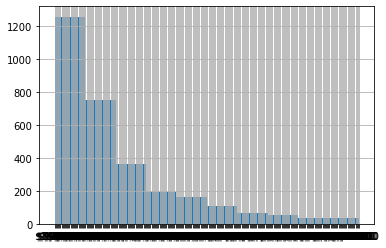

In [8]:
initial_df.price.hist()

In [9]:
initial_df.dtypes


name                               object
summary                            object
description                        object
neighborhood_overview              object
transit                            object
host_since                         object
host_location                      object
host_about                         object
host_response_rate                 object
host_acceptance_rate               object
host_neighbourhood                 object
host_verifications                 object
neighbourhood_cleansed             object
city                               object
state                              object
zipcode                            object
market                             object
smart_location                     object
country_code                       object
country                            object
property_type                      object
room_type                          object
accommodates                        int64
bathrooms                         

In [10]:
state_columns_mark = initial_df.state.unique()
property_type_mark = initial_df.property_type.unique()
review_rating_mark = ["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-84", "85-89", "90-94", "95-100"]

In [11]:
# remove NaN values from dataframe
original = len(initial_df)
initial_df = initial_df.dropna(how='any', subset=['state', 'property_type', 'bedrooms', 'beds', 'bathrooms'])
print ('Number of NaN values removed:', original - len(initial_df))

# convert formatting for price
initial_df['price'] = (initial_df['price'].replace({ r'[^-+\d.]': '',np.nan: 0}, regex=True).astype(float))

# drop any inconsistent values
print ('Number of Accommodates 0:', len(initial_df[initial_df['accommodates'] == 0]))
print ('Number of Bedrooms 0:', len(initial_df[initial_df['bedrooms'] == 0]))
print ('Number of Beds 0:', len(initial_df[initial_df['beds'] == 0]))
print ('Number of Listings with Price $0.00:', len(initial_df[initial_df['price'] == 0.00]))

initial_df = initial_df[initial_df['accommodates'] != 0.0]
initial_df = initial_df[initial_df['bedrooms'] != 0.0]
initial_df = initial_df[initial_df['beds'] != 0.0]
initial_df = initial_df[initial_df['price'] != 0.00]


Number of NaN values removed: 43
Number of Accommodates 0: 0
Number of Bedrooms 0: 320
Number of Beds 0: 0
Number of Listings with Price $0.00: 0


## Dropping initial columns
NLP will not be used in the creation of an initial model. Therefore, free text columns will be dropped for now, as will other columns which are not useful for predicting price.

In [12]:
cols = [
    'state',
    'property_type',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'bed_type',
    'price',
    'number_of_reviews',
    'review_scores_rating',
    'calculated_host_listings_count',
    'guests_included',
    'minimum_nights',
    'maximum_nights',
    'bathrooms'
]
df = initial_df[cols]

Other columns can be dropped because they contain a majority of null entries.

In [13]:
df.isna().sum()

state                               0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                            0
beds                                0
bed_type                            0
price                               0
number_of_reviews                   0
review_scores_rating              615
calculated_host_listings_count      0
guests_included                     0
minimum_nights                      0
maximum_nights                      0
bathrooms                           0
dtype: int64

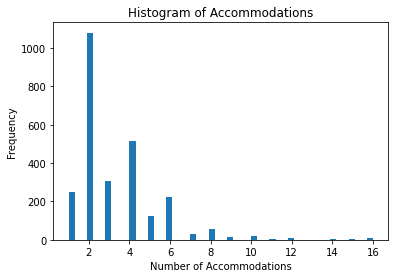

In [14]:
# visualize distribution of price (target variable)
plt.hist(df['accommodates'], bins=50)
plt.title("Histogram of Accommodations")
plt.xlabel("Number of Accommodations")
plt.ylabel("Frequency")
plt.show()

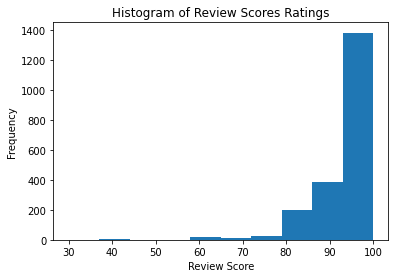

In [15]:
# visualize distribution of review scores ratings
plt.hist(df['review_scores_rating'][~df['review_scores_rating'].isnull()])
plt.title("Histogram of Review Scores Ratings")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()


There are  614 listings with no review_scores_rating (NaN) values. We will handle this by turning the review_scores_ratings into a categorical predictor. Based on the histogram, we see that a vast majority of the listings seem to have overall favorable ratings; i.e. skewed left distribution. We replace any NaN values that have no review with 'No Reviews' and we remove any remaining inconsistent NaN values that have a number_of_reviews > 0. We will also convert the review_scores_ratings into buckets. We will have the bucket ranges set more closely to a higher review score to accomodate for the skewed left distribution of the review scores.

In [16]:
# turn NaN scores with 0 reviews into 'No Reviews'
idx_vals = df['review_scores_rating'][df['number_of_reviews'] == 0].index.values.tolist()
df.loc[idx_vals, ('review_scores_rating')] = df['review_scores_rating'][df['number_of_reviews'] == 0].replace('NaN', 'No Reviews')

# remove inconsistent NaN values
df = df[~df['review_scores_rating'].isnull()]


/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [17]:
# convert review_scores_rating into buckets
review_rating_mark = ["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-84", "85-89", "90-94", "95-100"]

def convert_scores_buckets(val):
    if val == 'No Reviews':
        return 'No Reviews'
    elif val >= 95.0:
        return '95-100'
    elif val >= 90.0 and val < 95.0:
        return '90-94'
    elif val >= 85.0 and val < 90.0:
        return '85-89'
    elif val >= 80.0 and val < 85.0:
        return '80-84'
    elif val >= 70.0 and val < 80.0:
        return '70-79'
    elif val >= 60.0 and val < 70.0:
        return '60-69'
    elif val >= 50.0 and val < 60.0:
        return '50-59'
    elif val >= 40.0 and val < 50.0:
        return '40-49'
    elif val >= 30.0 and val < 40.0:
        return '30-39'
    elif val >= 20.0 and val < 30.0:
        return '20-29'
    elif val >= 10.0 and val < 20.0:
        return '10-19'
    elif val < 10.0:
        return '0-9'
review_scores_rating = df['review_scores_rating'].apply(convert_scores_buckets)
df['review_scores_rating'] = pd.get_dummies(review_scores_rating).reindex(columns=review_rating_mark).fillna(0).astype(int)
print ('Unique Values in the Column:', np.unique(df['review_scores_rating']))

Unique Values in the Column: [0]


In [18]:
# encode categorical variables property_type_mark
state_dummies = pd.get_dummies(df['state']).reindex(columns=state_columns_mark).fillna(0).astype(int)
property_type_dummies = pd.get_dummies(df['property_type']).reindex(columns=property_type_mark).fillna(0).astype(int)
room_dummies = pd.get_dummies(df['room_type'])
bed_dummies = pd.get_dummies(df['bed_type'])
review_scores_rating = df['review_scores_rating'].apply(convert_scores_buckets)
ratings_scores_dummies = pd.get_dummies(review_scores_rating).reindex(columns=review_rating_mark).fillna(0).astype(int)

# replace the old columns with our new one-hot encoded ones
data = pd.concat((df.drop(['state', \
     'room_type','property_type', 'bed_type', 'review_scores_rating'], axis=1), \
    state_dummies.astype(int), \
    room_dummies.astype(int),property_type_dummies, bed_dummies.astype(int), ratings_scores_dummies.astype(int)), \
    axis=1)

print('Number of Columns:', len(data.columns))

# move target predictor 'price' to the end of the dataframe
df_cols = list(data.columns.values)
idx = df_cols.index('price')
rearrange_cols = df_cols[:idx] + df_cols[idx+1:] + [df_cols[idx]]
data = data[rearrange_cols]

Number of Columns: 47


In [19]:
data.head()

,accommodates,bedrooms,beds,number_of_reviews,calculated_host_listings_count,guests_included,minimum_nights,maximum_nights,bathrooms,DC,MD,NY,VA,Washington DC,Entire home/apt,Private room,Shared room,Apartment,House,Townhouse,Bed & Breakfast,Condominium,...,Boat,Dorm,NaN,Bungalow,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-84,85-89,90-94,95-100,price
0,4,1.0,1.0,2,41,2,3,90,1.0,1,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,195.0
1,2,1.0,1.0,2,1,2,2,1125,1.5,1,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,150.0
2,6,2.0,3.0,53,3,4,4,90,1.0,1,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,140.0
4,2,1.0,1.0,3,3,0,4,14,1.0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,119.0
5,1,1.0,1.0,1,5,1,1,1125,1.0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,49.0


In [20]:
df.isna().sum()

state                             0
property_type                     0
room_type                         0
accommodates                      0
bedrooms                          0
beds                              0
bed_type                          0
price                             0
number_of_reviews                 0
review_scores_rating              0
calculated_host_listings_count    0
guests_included                   0
minimum_nights                    0
maximum_nights                    0
bathrooms                         0
dtype: int64

In [21]:
y = data['price'].values
del data['price']


In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, random_state = 42)

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
def mae(predict, target):
    errors = abs(predict - y_test)
    return round(np.mean(errors),2)

In [25]:
def get_accuracy(error, target):
    mape = 100 * (error/target)
    accuracy = 100 - np.mean(mape)
    return round(accuracy, 2)

In [26]:
def compute_mae(X_train, y_train, X_test, y_test, max_leaf_nodes):
    trees_model = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes, random_state = 42) 
    trees_model.fit(X_train, y_train) 
    test_predictions = trees_model.predict(X_test) 
    error = mae(test_predictions,y_test)
  
    return(error)

def get_best_tree_size(X_train, y_train, X_test, y_test, verbose = False):
    
    
    minimum_error = None
    best_tree_size = 5 
    candidate_max_leaf_nodes = [5, 10, 20, 30, 50, 100, 250, 500]

    for max_leaf_nodes in candidate_max_leaf_nodes:
        
        current_error = compute_mae(X_train, y_train, X_test, y_test, max_leaf_nodes) 
        current_accuracy = get_accuracy(current_error, y_test)
        verbose and print("(Size: {}, MAE: {}, Accuracy: {})".format(max_leaf_nodes, current_error,current_accuracy)) 
    
        if(minimum_error == None or current_error < minimum_error): 
            minimum_error = current_error 
            best_tree_size = max_leaf_nodes 
            
     
    return(best_tree_size) 
  
best_tree_size = get_best_tree_size(X_train, y_train, X_test, y_test, True) 
best_tree_size

(Size: 5, MAE: 40.47, Accuracy: 58.82)
(Size: 10, MAE: 37.15, Accuracy: 62.2)
(Size: 20, MAE: 37.93, Accuracy: 61.4)
(Size: 30, MAE: 37.6, Accuracy: 61.74)
(Size: 50, MAE: 37.39, Accuracy: 61.95)
(Size: 100, MAE: 37.97, Accuracy: 61.36)
(Size: 250, MAE: 41.47, Accuracy: 57.8)
(Size: 500, MAE: 44.41, Accuracy: 54.81)


10

In [27]:
from sklearn.ensemble import RandomForestRegressor


In [28]:
def compute_mae_for_random_tree(X_train, y_train, X_test, y_test, n_estimators):
    random_tree_model = RandomForestRegressor(n_estimators = n_estimators, random_state = 42) 
    random_tree_model.fit(X_train, y_train) 
    test_predictions = random_tree_model.predict(X_test) 
    error = mae(test_predictions,y_test)
  
    return(error)

def get_best_estimators(X_train, y_train, X_test, y_test, verbose = False):
    
    
    minimum_error = None
    best_n_estimator = 5 
    candidate_n_estimators = [5, 10, 20, 30, 50, 100, 250, 500]

    for n_estimator in candidate_n_estimators:
        
        current_error = compute_mae_for_random_tree(X_train, y_train, X_test, y_test, n_estimator) 
        current_accuracy = get_accuracy(current_error, y_test)
        verbose and print("(Size: {}, MAE: {}, Accuracy: {})".format(n_estimator, current_error,current_accuracy)) 
    
        if(minimum_error == None or current_error < minimum_error): 
            minimum_error = current_error 
            best_n_estimator = n_estimator 
            
     
    return(best_n_estimator) 
  
best_estimators = get_best_estimators(X_train, y_train, X_test, y_test, True) 
best_estimators

(Size: 5, MAE: 35.18, Accuracy: 64.2)
(Size: 10, MAE: 33.96, Accuracy: 65.44)
(Size: 20, MAE: 32.97, Accuracy: 66.45)
(Size: 30, MAE: 33.19, Accuracy: 66.23)
(Size: 50, MAE: 32.9, Accuracy: 66.52)
(Size: 100, MAE: 32.58, Accuracy: 66.85)
(Size: 250, MAE: 32.32, Accuracy: 67.11)
(Size: 500, MAE: 32.34, Accuracy: 67.09)


250

In [59]:
rf_model = RandomForestRegressor(n_estimators = 50, random_state = 42) 
rf_model.fit(X_train, y_train) 
test_predictions = rf_model.predict(X_test) 
error = mae(test_predictions,y_test)
acc = get_accuracy(error, y_test)
error, acc

(32.9, 66.52)

#### The best accuracy is 66, 52 % with mae 32.9. Was choicing n_estimators = 50 for avoiding overfitting 

In [30]:
submission_df = pd.read_csv('/Submission.csv')
submission_df.isna().sum()


name                                0
summary                            43
description                         0
neighborhood_overview             217
transit                           197
host_since                          0
host_location                       1
host_about                        165
host_response_rate                 72
host_acceptance_rate              106
host_neighbourhood                 46
host_verifications                  0
neighbourhood_cleansed              0
city                                0
state                               0
zipcode                             1
market                              0
smart_location                      0
country_code                        0
country                             0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           2
bedrooms                            2
beds                                0
bed_type    

In [31]:
sub_cols = [
    'state',
    'property_type',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'bed_type',
    'number_of_reviews',
    'review_scores_rating',
    'calculated_host_listings_count',
    'guests_included',
    'minimum_nights',
    'maximum_nights',
    'bathrooms'
]


In [49]:
def prepare_df_sub():
    current_df = submission_df
    current_df = current_df.dropna(how='any', subset=['state', 'property_type', 'bedrooms', 'beds', 'bathrooms'])
    current_df = current_df[current_df['accommodates'] != 0.0]
    current_df = current_df[current_df['bedrooms'] != 0.0]
    current_df = current_df[current_df['beds'] != 0.0]
    current_df =  current_df[sub_cols]
    idx_vals = current_df['review_scores_rating'][current_df['number_of_reviews'] == 0].index.values.tolist()
    current_df.loc[idx_vals, ('review_scores_rating')] = current_df['review_scores_rating'][current_df['number_of_reviews'] == 0].replace('NaN', 'No Reviews')
    current_df = current_df[~current_df['review_scores_rating'].isnull()]
    
    review_scores_rating_sub = current_df ['review_scores_rating'].apply(convert_scores_buckets)
    
    state_dummies_sub = pd.get_dummies(current_df['state']).reindex(columns=state_columns_mark).fillna(0).astype(int)
    property_type_dummies_sub = pd.get_dummies(current_df['property_type']).reindex(columns=property_type_mark).fillna(0).astype(int)
    room_dummies_sub = pd.get_dummies(current_df['room_type'])
    bed_dummies_sub = pd.get_dummies(current_df['bed_type'])
    
    ratings_scores_dummies_sub = pd.get_dummies(review_scores_rating_sub).reindex(columns=review_rating_mark).fillna(0).astype(int)

# replace the old columns with our new one-hot encoded ones
    result = pd.concat((current_df.drop(['state', \
     'room_type','property_type', 'bed_type', 'review_scores_rating'], axis=1), \
    state_dummies_sub.astype(int), \
    room_dummies_sub.astype(int),property_type_dummies_sub, bed_dummies_sub.astype(int), ratings_scores_dummies_sub.astype(int)), \
    axis=1)
    
    return result


In [50]:
submission_prepared_df = prepare_df_sub()

In [51]:
submission_prepared_df.head()

,accommodates,bedrooms,beds,number_of_reviews,calculated_host_listings_count,guests_included,minimum_nights,maximum_nights,bathrooms,DC,MD,NY,VA,Washington DC,Entire home/apt,Private room,Shared room,Apartment,House,Townhouse,Bed & Breakfast,Condominium,...,Loft,Boat,Dorm,NaN,Bungalow,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-84,85-89,90-94,95-100
0,2,1.0,2.0,1,5,2,3,1125,1.0,1,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,2,1.0,1.0,2,1,1,1,3,1.0,1,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,2,1.0,1.0,10,1,2,2,1125,1.0,1,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,5,2.0,3.0,11,2,4,2,40,1.0,1,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,4,1.0,2.0,136,4,2,1,1125,1.0,1,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [52]:
y_sub = rf_model.predict(submission_prepared_df)

In [53]:
submission_prepared_df["price"] = y_sub

In [54]:
submission_prepared_df.head()

,accommodates,bedrooms,beds,number_of_reviews,calculated_host_listings_count,guests_included,minimum_nights,maximum_nights,bathrooms,DC,MD,NY,VA,Washington DC,Entire home/apt,Private room,Shared room,Apartment,House,Townhouse,Bed & Breakfast,Condominium,...,Boat,Dorm,NaN,Bungalow,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-84,85-89,90-94,95-100,price
0,2,1.0,2.0,1,5,2,3,1125,1.0,1,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,171.068533
1,2,1.0,1.0,2,1,1,1,3,1.0,1,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,112.991035
2,2,1.0,1.0,10,1,2,2,1125,1.0,1,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,119.735590
3,5,2.0,3.0,11,2,4,2,40,1.0,1,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,169.032000
4,4,1.0,2.0,136,4,2,1,1125,1.0,1,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,145.264000


In [58]:
submission_prepared_df.to_csv('submission_final.csv')